In [309]:
import pandas as pd
import matplotlib as mpl
from collections import Counter
import matplotlib.pyplot  as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

### Part I:  Find the Most Popular Actors

In [234]:
local_file="data/movie_title_ratings.csv"
source=local_file
df1 = pd.read_csv(source)


/Users/amjad/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [242]:
df2= pd.read_csv("data/title.principals.tsv",sep='\t')
df2= pd.merge(df1, df2, on='tconst')
df2=df2[df2.runtimeMinutes!='\\N']
df2=df2[df2.startYear!='\\N']
df2=df2[df2.principalCast!='\\N']
df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,principalCast
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,58,"nm0085156,nm0183823,nm0063086,nm1309758"
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,236,"nm0280615,nm4082222,nm2256592,nm0103755,nm0714..."
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.4,413,"nm2421834,nm0170118,nm0846911,nm0846894,nm0425..."
4,tt0000584,movie,El ciego de la aldea,El ciego de la aldea,0,1907,\N,75,Drama,4.8,35,"nm0191133,nm0305591,nm0400103"
9,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",6.1,24,"nm0000875,nm0933446,nm0122665,nm0877783,nm0542..."


In [163]:
#actorId: ids for the most popular actors - 1000 actors
#count: # of movies each actor was in
actorID, count = list(zip(*Counter(','.join(df2['principalCast']).replace(' ', '').split(',')).most_common(1000)))

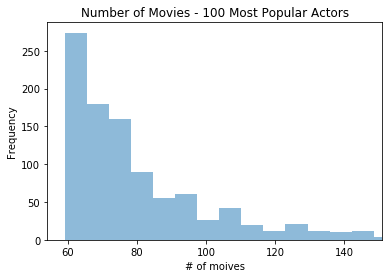

In [164]:
numMovies=list(count)
q3= np.percentile(numMovies, 50)
# fixed bin size
bins= int(np.sqrt(len(numMovies)-1)-1)
plt.xlim([min(numMovies)-5, 2*q3+5])
plt.hist(numMovies,bins=bins, alpha=0.5)
plt.title('Number of Movies - 100 Most Popular Actors')
plt.xlabel('# of moives')
plt.ylabel('Frequency')

plt.show()

In [165]:
d = {'actorID': list(actorID), 'count': list(count)}
actors_df = pd.DataFrame(data=d)
actors_df.head()

,actorID,count
0,nm0000636,251
1,nm0001553,248
2,nm0627060,240
3,nm0006064,211
4,nm0005996,210


In [169]:
# convert principalCast from str to list 
df2['principalCast'] = df2.principalCast.apply(lambda l: list(l.split(',')))

In [172]:
def isInMovie(row,actorID,movies):
    if actorID in row.principalCast:
        movies.append(row.tconst)
# get all the movies an actor was in
def getAllMovies(actorID):
    movies=[]
    for row in df2.itertuples():
        isInMovie(row,actorID,movies)
    return movies


In [173]:
actors_df['moviesList']= actors_df.actorID.apply(getAllMovies)

In [159]:
df3= pd.read_csv("data/name.basics.tsv",sep='\t')
df3.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0028333,tt0050419,tt0120689"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0055688,tt0040506,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0063715,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0077975,tt0080455,tt0078723,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"


In [177]:
actorsDF=df3[df3.nconst.isin(list(actorID))]
actorsDF=actorsDF[['nconst','primaryName','knownForTitles']]
actorsDF.head()

,nconst,primaryName,knownForTitles
4,nm0000005,Ingmar Bergman,"tt0050976,tt0083922,tt0060827,tt0050986"
6,nm0000007,Humphrey Bogart,"tt0033870,tt0034583,tt0038355,tt0040897"
9,nm0000010,James Cagney,"tt0042041,tt0035575,tt0031867,tt0029870"
10,nm0000011,Gary Cooper,"tt0027996,tt0033891,tt0044706,tt0034167"
11,nm0000012,Bette Davis,"tt0056687,tt0030287,tt0035140,tt0042192"


In [178]:
# get avg rating of movies each actor was in, count using the pre-processed movies data set
def getAvgRatings(titlesList):
    sumRatings=0
    count=0
    for title in titlesList:
        titleDf = df2[df2.tconst==title]
        if not titleDf.empty:
            sumRatings+=titleDf.averageRating.iloc[0]
            count+=1
    if count==0:
        return 0
    else:
        return sumRatings/count
    

actors_df['AvgMoviesRating']=actors_df.moviesList.apply(lambda title: getAvgRatings(title))
# actors_df['NumMovies']=actorsDF.knownForTitles.apply(lambda title: getNumMovies(title))

In [299]:
actors_df=df5=pd.read_csv("data/top1000.csv")


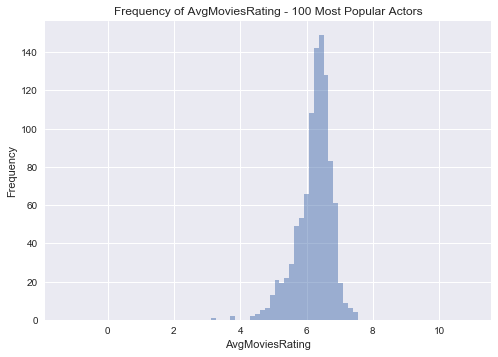

In [306]:

q3= np.percentile(actors_df['AvgMoviesRating'], 75)
# fixed bin size
bins= int(np.sqrt(len(actors_df['AvgMoviesRating'])-1)-1)
plt.xlim([min(actors_df['AvgMoviesRating'])-5, q3+5])
plt.hist(actors_df['AvgMoviesRating'],bins=bins, alpha=0.5)
plt.title('Frequency of AvgMoviesRating - 100 Most Popular Actors')
plt.xlabel('AvgMoviesRating')
plt.ylabel('Frequency')

plt.show()

### Part II: Simple Linear Regression

In [253]:
df2["runtimeMinutes"]=df2.runtimeMinutes.apply(int)
df2["numVotes"]=df2.numVotes.apply(int)
df2["startYear"]=df2.startYear.apply(int)

In [244]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [245]:
df2["runtimeMinutes"]= reject_outliers(df2["runtimeMinutes"])
df2["numVotes"] = reject_outliers(df2["numVotes"])


In [246]:
df2=df2.dropna()

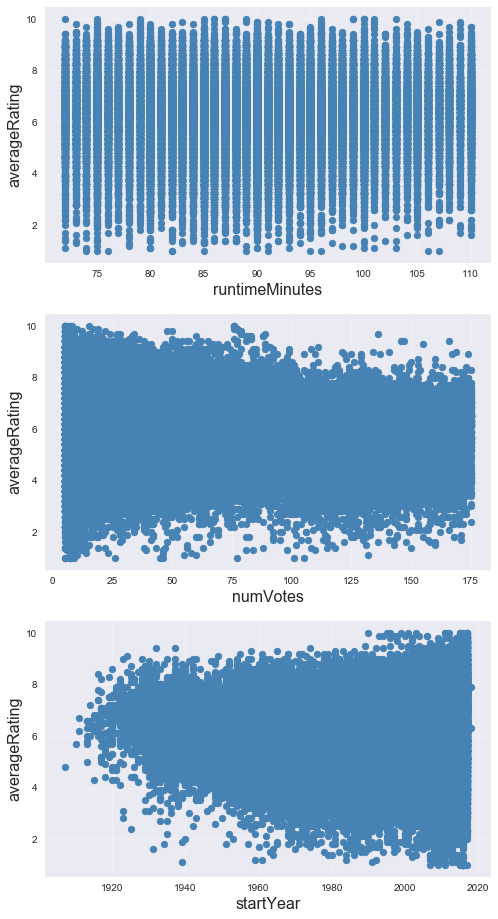

In [256]:

features = ["runtimeMinutes", "numVotes","startYear"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,16))


for axi, m in enumerate(features): 
    axes[axi].scatter(df2[m], df2["averageRating"], color="steelblue")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(m, fontsize=16)
    axes[axi].set_ylabel("averageRating", fontsize=16)
plt.show()

In [254]:
for f in features: 
    print("SLR for {} vs averageRating".format(f))
    print("----------------------")
   
    bhat, ahat, rval, pval, stderr = stats.linregress(df2[f], df2["averageRating"]) 
    print("intercept = {:.4f}".format(ahat))
    print("slope = {:.4f}".format(bhat))
    print("p-value = {}".format(pval))
    print("\n")

SLR for runtimeMinutes vs averageRating
----------------------
intercept = 6.2561
slope = -0.0002
p-value = 0.6446940102681785


SLR for numVotes vs averageRating
----------------------
intercept = 6.4318
slope = -0.0043
p-value = 0.0


SLR for startYear vs averageRating
----------------------
intercept = -3.6093
slope = 0.0049
p-value = 1.145866756647367e-146




In [257]:
# Collect the features in a 2D array 
X = df2[["runtimeMinutes", "numVotes","startYear"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = df2["averageRating"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

In [258]:
print(model.params)

const            -4.041476
runtimeMinutes    0.001086
numVotes         -0.004450
startYear         0.005219
dtype: float64


In [259]:
df2[["runtimeMinutes", "numVotes","startYear"]].corr()

,runtimeMinutes,numVotes,startYear
runtimeMinutes,1.000000,0.087685,0.036972
numVotes,0.087685,1.000000,0.035654
startYear,0.036972,0.035654,1.000000


In [314]:
# Dataset from : https://www.kaggle.com/PromptCloudHQ/imdb-data
df5=pd.read_csv("data/IMDB-Movie-Data.csv")
df5=df5.dropna()


df5.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


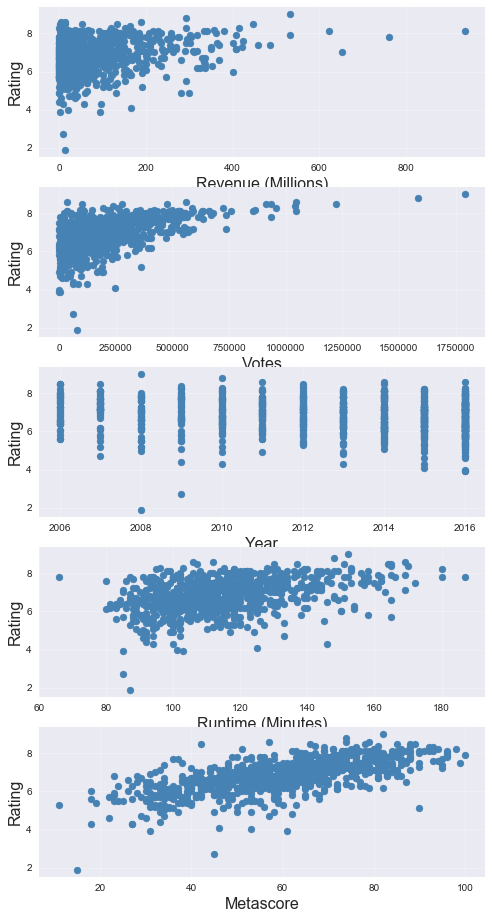

In [316]:
features = ["Revenue (Millions)", "Votes","Year","Runtime (Minutes)","Metascore"]
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8,16))
for axi, m in enumerate(features): 
    axes[axi].scatter(df5[m], df5["Rating"], color="steelblue")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(m, fontsize=16)
    axes[axi].set_ylabel("Rating", fontsize=16)
plt.show()


In [317]:
# Collect the features in a 2D array 
X = df5.loc[:, ["Revenue (Millions)"]]

X = df5.loc[:, ["Votes","Year","Runtime (Minutes)","Metascore"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = df5["Rating"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

In [318]:
print(model.params)

const                1.657921
Votes                0.000001
Year                 0.001215
Runtime (Minutes)    0.006738
Metascore            0.028399
dtype: float64


In [293]:
df5[["Votes","Year","Runtime (Minutes)"]].corr()

,Votes,Year,Runtime (Minutes)
Votes,1.000000,-0.411904,0.407062
Year,-0.411904,1.000000,-0.164900
Runtime (Minutes),0.407062,-0.164900,1.000000


### Part III: Using Sklearn 